In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("tourism.csv")

In [3]:
df.head()
#display the top 5 rows

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C03622V04362,Country,C02293V02763,Direction,UNIT,VALUE
0,ASA03,Air and Sea Travel,2010,2010,-,All countries,1,Arrivals,Thousand,12902.2
1,ASA03,Air and Sea Travel,2010,2010,-,All countries,2,Departures,Thousand,12920.2
2,ASA03,Air and Sea Travel,2010,2010,AE,United Arab Emirates,1,Arrivals,Thousand,99.0
3,ASA03,Air and Sea Travel,2010,2010,AE,United Arab Emirates,2,Departures,Thousand,99.0
4,ASA03,Air and Sea Travel,2010,2010,AT,Austria,1,Arrivals,Thousand,65.3


In [4]:
df.tail()
#display the bottom 5 rows

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C03622V04362,Country,C02293V02763,Direction,UNIT,VALUE
1195,ASA03,Air and Sea Travel,2024,2024,ZZEUBQAC,Other Europe (33),2,Departures,Thousand,68.3
1196,ASA03,Air and Sea Travel,2024,2024,ZZZ11,Other Countries(43),1,Arrivals,Thousand,1.7
1197,ASA03,Air and Sea Travel,2024,2024,ZZZ11,Other Countries(43),2,Departures,Thousand,1.7
1198,ASA03,Air and Sea Travel,2024,2024,ZZZ13,Other transatlantic countries(2),1,Arrivals,Thousand,97.0
1199,ASA03,Air and Sea Travel,2024,2024,ZZZ13,Other transatlantic countries(2),2,Departures,Thousand,99.3


In [5]:
df.shape
#checking the data shape

(1200, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        1200 non-null   object 
 1   STATISTIC Label  1200 non-null   object 
 2   TLIST(A1)        1200 non-null   int64  
 3   Year             1200 non-null   int64  
 4   C03622V04362     1200 non-null   object 
 5   Country          1200 non-null   object 
 6   C02293V02763     1200 non-null   int64  
 7   Direction        1200 non-null   object 
 8   UNIT             1200 non-null   object 
 9   VALUE            1200 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 93.9+ KB


In [7]:
df.describe()

,TLIST(A1),Year,C02293V02763,VALUE
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,2017.000000,2017.000000,1.500000,759.291500
std,4.322295,4.322295,0.500208,2654.720721
min,2010.000000,2010.000000,1.000000,0.000000
25%,2013.000000,2013.000000,1.000000,29.725000
50%,2017.000000,2017.000000,1.500000,75.600000
75%,2021.000000,2021.000000,2.000000,266.950000
max,2024.000000,2024.000000,2.000000,21458.500000


In [8]:
df.describe()

,TLIST(A1),Year,C02293V02763,VALUE
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,2017.000000,2017.000000,1.500000,759.291500
std,4.322295,4.322295,0.500208,2654.720721
min,2010.000000,2010.000000,1.000000,0.000000
25%,2013.000000,2013.000000,1.000000,29.725000
50%,2017.000000,2017.000000,1.500000,75.600000
75%,2021.000000,2021.000000,2.000000,266.950000
max,2024.000000,2024.000000,2.000000,21458.500000


In [9]:
df.isnull().sum()
#checking missing data

STATISTIC          0
STATISTIC Label    0
TLIST(A1)          0
Year               0
C03622V04362       0
Country            0
C02293V02763       0
Direction          0
UNIT               0
VALUE              0
dtype: int64

In [10]:
duplicate_rows_df=df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)
#checking the duplicated rows

number of duplicate rows: (0, 10)


In [11]:
df=df.drop(["STATISTIC","TLIST(A1)", "C03622V04362"], axis=1)
df.head()
#dropping irrelevant(duplicated meaning) columns

,STATISTIC Label,Year,Country,C02293V02763,Direction,UNIT,VALUE
0,Air and Sea Travel,2010,All countries,1,Arrivals,Thousand,12902.2
1,Air and Sea Travel,2010,All countries,2,Departures,Thousand,12920.2
2,Air and Sea Travel,2010,United Arab Emirates,1,Arrivals,Thousand,99.0
3,Air and Sea Travel,2010,United Arab Emirates,2,Departures,Thousand,99.0
4,Air and Sea Travel,2010,Austria,1,Arrivals,Thousand,65.3


In [12]:
df=df.rename(columns={"C02293V02763":"Code"})
df.head(5)
#renaming the column

,STATISTIC Label,Year,Country,Code,Direction,UNIT,VALUE
0,Air and Sea Travel,2010,All countries,1,Arrivals,Thousand,12902.2
1,Air and Sea Travel,2010,All countries,2,Departures,Thousand,12920.2
2,Air and Sea Travel,2010,United Arab Emirates,1,Arrivals,Thousand,99.0
3,Air and Sea Travel,2010,United Arab Emirates,2,Departures,Thousand,99.0
4,Air and Sea Travel,2010,Austria,1,Arrivals,Thousand,65.3


In [13]:
yearly_totals = df[df["Country"] == "All countries"].groupby(["Year", "Direction"])["VALUE"].sum().unstack()

In [14]:
df=df[df["Country"]!="All countries"]
df.head()
#dropping the rows that unnecessary 

,STATISTIC Label,Year,Country,Code,Direction,UNIT,VALUE
2,Air and Sea Travel,2010,United Arab Emirates,1,Arrivals,Thousand,99.0
3,Air and Sea Travel,2010,United Arab Emirates,2,Departures,Thousand,99.0
4,Air and Sea Travel,2010,Austria,1,Arrivals,Thousand,65.3
5,Air and Sea Travel,2010,Austria,2,Departures,Thousand,64.5
6,Air and Sea Travel,2010,Belgium,1,Arrivals,Thousand,162.1


In [15]:
df.shape

(1170, 7)

<Axes: xlabel='VALUE'>

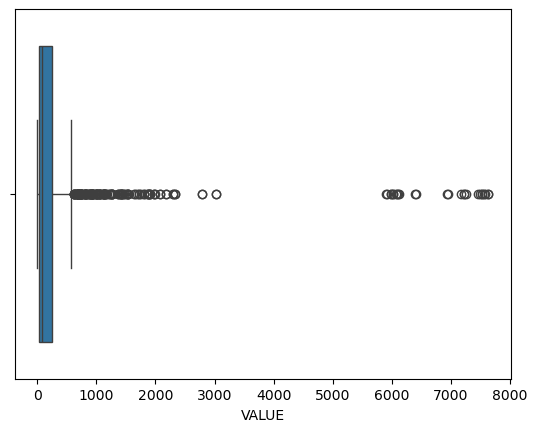

In [16]:
import matplotlib.pyplot as plt
sns.boxplot(x=df["VALUE"])
#detecting outliers

## Histogram

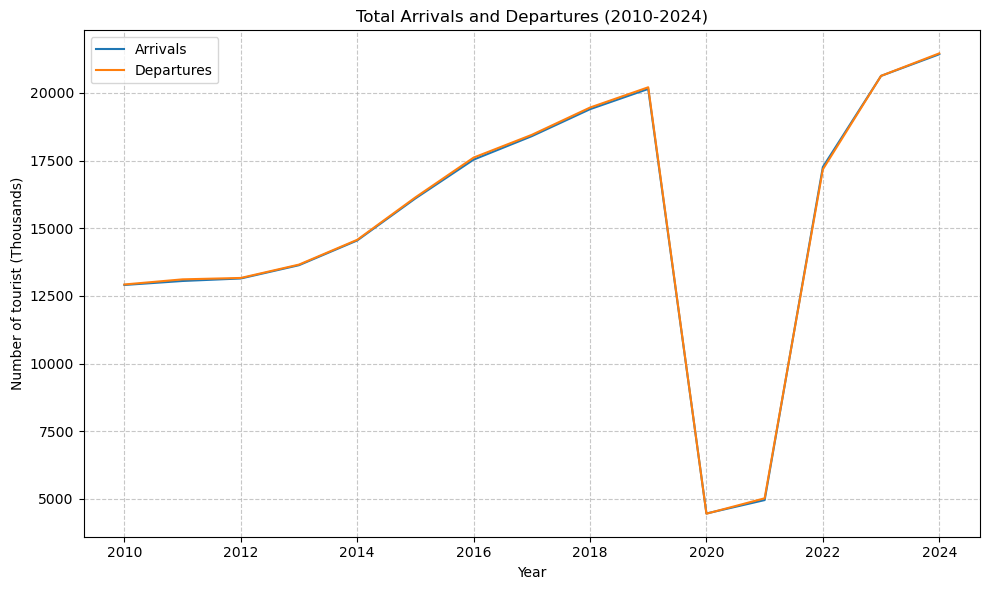

In [17]:
plt.figure(figsize=(10,6))
plt.plot(yearly_totals.index, yearly_totals["Arrivals"],label="Arrivals")
plt.plot(yearly_totals.index, yearly_totals["Departures"],label="Departures")
plt.title("Total Arrivals and Departures (2010-2024)")
plt.xlabel("Year")
plt.ylabel("Number of tourist (Thousands)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\nzaya\AppData\Local\Temp\ipykernel_10276\1426602681.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_totals.index, y=country_totals.values, palette="viridis")


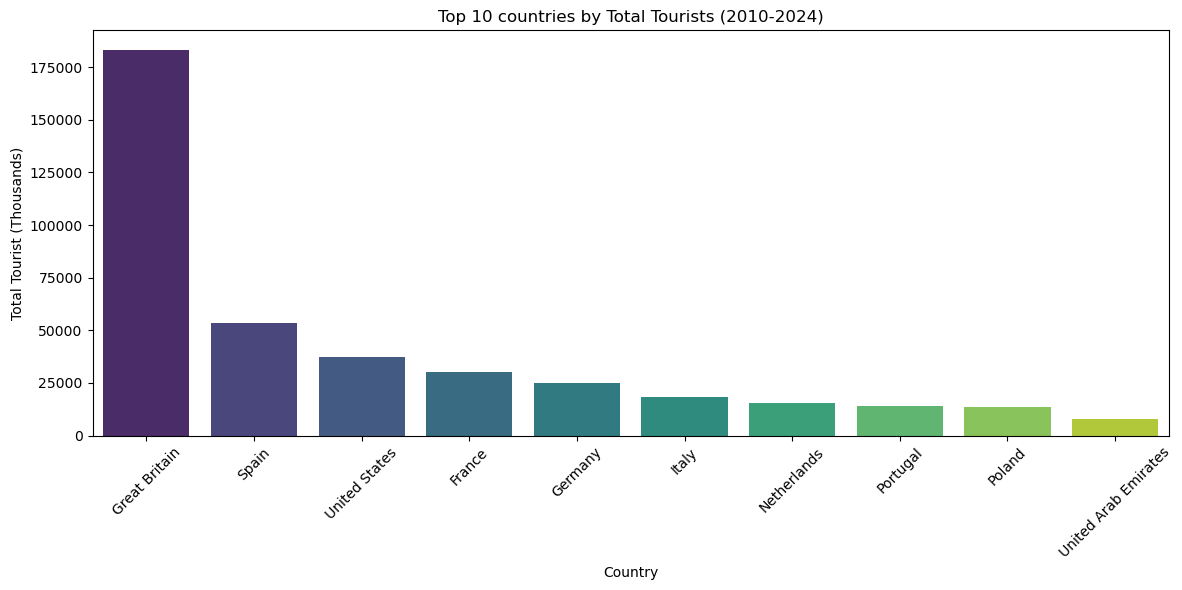

In [19]:
country_totals=df.groupby("Country")["VALUE"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=country_totals.index, y=country_totals.values, palette="viridis")
plt.title("Top 10 countries by Total Tourists (2010-2024)")
plt.xlabel("Country")
plt.ylabel("Total Tourist (Thousands)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\nzaya\AppData\Local\Temp\ipykernel_10276\2260161507.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="VALUE", data=df, palette="pastel")


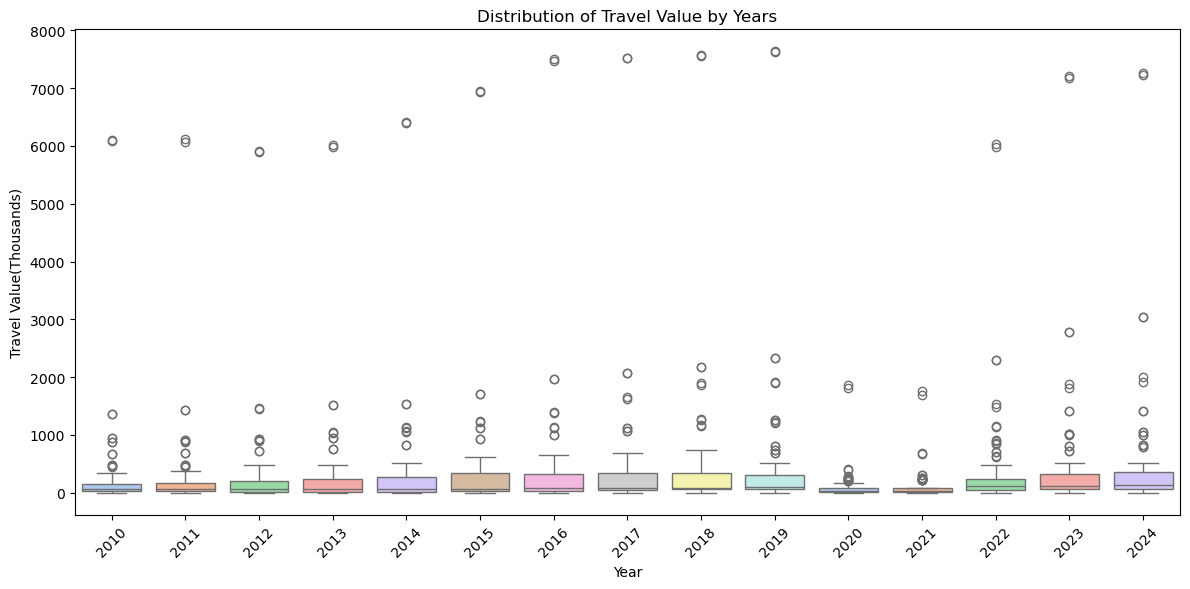

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Year", y="VALUE", data=df, palette="pastel")
plt.title("Distribution of Travel Value by Years")
plt.xlabel("Year")
plt.ylabel("Travel Value(Thousands)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Statistic